In [1]:
# lets import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import style

import scipy.stats
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
!pip install imblearn

In [3]:
# Lets import the data set
data = pd.read_csv(r'C:\Users\joshu\Desktop\Studies\upGrad _ Assignment\Telecom Churn Analysis\Workings\telecom_churn_data.csv', index_col = 'mobile_number')

In [4]:
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
data.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Columns: 225 entries, circle_id to sep_vbc_3g
dtypes: float64(179), int64(34), object(12)
memory usage: 172.4+ MB


### EDA

In [7]:
data.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'arpu_6', 'arpu_7',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=225)

In [8]:
# lets filter the High-Value Customers as per the given guidelines

data['avg_6_7'] = round(data[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis = 1),2)
data['per_6_7'] = round(data.avg_6_7.quantile(0.7),2)

In [9]:
data[['total_rech_amt_6', 'total_rech_amt_7', 'avg_6_7', 'per_6_7']].head()

,total_rech_amt_6,total_rech_amt_7,avg_6_7,per_6_7
mobile_number,,,,
7000842753,362,252,307.0,368.5
7001865778,74,384,229.0,368.5
7001625959,168,315,241.5,368.5
7001204172,230,310,270.0,368.5
7000142493,196,350,273.0,368.5


In [10]:
data = data.loc[(data.avg_6_7 > data.per_6_7)]
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,...,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_6_7,per_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,...,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,368.5
7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,...,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0,368.5
7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,...,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0,368.5
7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,...,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0,459.0,368.5
7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,18.980,...,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0,408.0,368.5


In [11]:
# Lets segregate the churn as per the said phases

data['churn'] = ((((data.total_ic_mou_9 == 0) | (data.total_og_mou_9 == 0)) & ((data.vol_2g_mb_9 == 0) | (data.vol_3g_mb_9 == 0))))

In [12]:
data['churn'] = data['churn'].astype(int)

In [13]:
data.churn.value_counts()

0    26936
1     3043
Name: churn, dtype: int64

In [14]:
# lets rename the other columns

data = data.rename(columns = {'june_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'})

In [15]:
# Lets drop the churn phase columns

data = data.drop('avg_6_7', axis = 1)
sep_cols = [col for col in data if col.endswith('_9')]
data = data.drop(sep_cols, axis = 1)
data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,jun_vbc_3g,per_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,...,0,NaN,NaN,NaN,802,57.74,19.38,18.74,368.5,1
7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,...,0,NaN,1.0,1.0,315,21.03,910.65,122.16,368.5,0
7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,...,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,368.5,0
7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,...,0,NaN,NaN,NaN,511,0.00,2.45,21.89,368.5,0
7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,690.008,18.980,25.499,...,0,NaN,NaN,NaN,667,0.00,0.00,0.00,368.5,0


In [16]:
# Lets convert the date columns

period_cols = [col for col in data if (col.startswith('last_date'))]
period_cols.extend(cols for cols in data if cols.startswith('date_of_last'))
period_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [17]:
data.last_date_of_month_8.dtype

dtype('O')

In [18]:
for i in period_cols:
    data[i] = data[i].astype('datetime64[ns]')

In [19]:
data.last_date_of_month_8.dtype

dtype('<M8[ns]')

In [20]:
# Days since last recharge

data['days_since_last_rech_6'] = data.last_date_of_month_6 - data.date_of_last_rech_6
data['days_since_last_rech_6'] = data.days_since_last_rech_6 / np.timedelta64(1, 'D')

data['days_since_last_rech_7'] = data.last_date_of_month_7 - data.date_of_last_rech_7
data['days_since_last_rech_7'] = data.days_since_last_rech_7 / np.timedelta64(1, 'D')

data['days_since_last_rech_8'] = data.last_date_of_month_8 - data.date_of_last_rech_7
data['days_since_last_rech_8'] = data.days_since_last_rech_8 / np.timedelta64(1, 'D')

data['days_since_last_rech_data_6'] = data.last_date_of_month_6 - data.date_of_last_rech_data_6
data['days_since_last_rech_data_6'] = data.days_since_last_rech_data_6 / np.timedelta64(1,'D')

data['days_since_last_rech_data_7'] = data.last_date_of_month_7 - data.date_of_last_rech_data_7
data['days_since_last_rech_data_7'] = data.days_since_last_rech_data_7 / np.timedelta64(1,'D')

data['days_since_last_rech_data_8'] = data.last_date_of_month_8 - data.date_of_last_rech_data_8
data['days_since_last_rech_data_8'] = data.days_since_last_rech_data_8 / np.timedelta64(1,'D')

In [21]:
# Lets drop the columns which are not most uesful

data = data.drop(period_cols, axis = 1)

In [22]:
other_cols = data.nunique() == 1
other_values = [i for i, x in enumerate(other_cols) if x]
data.iloc[:, other_values].head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,per_6_7
mobile_number,,,,,,,,,,,
7000701601,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5
7001524846,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5
7002191713,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5
7000875565,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5
7000187447,109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,368.5


In [23]:
data = data.drop(data.iloc[:, other_values], axis = 1)

In [24]:
# lets check the Outliers

data.quantile([0.02, 0.05, 0.10, 0.20, 0.75, 0.90, 0.95, 0.98, 0.99, 1])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,vbc_3g_8,vbc_3g_7,jun_vbc_3g,churn,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,days_since_last_rech_data_6,days_since_last_rech_data_7,days_since_last_rech_data_8
0.02,94.45080,104.02848,0.00000,0.0000,0.0000,0.000,7.4324,8.0000,0.300,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,31.0,0.0,0.0,0.0
0.05,202.18100,212.82470,22.22120,3.7410,3.6600,0.880,27.8900,28.3325,9.610,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,31.0,0.0,0.0,0.0
0.10,270.69220,274.45820,134.11860,12.0140,11.5100,6.480,57.9640,58.9100,33.140,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,31.0,1.0,1.0,1.0
0.20,339.26500,339.49840,252.40600,31.3900,31.0100,22.630,114.2600,113.1900,82.330,0.0000,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,31.0,2.0,2.0,2.0
0.75,704.18450,700.98600,671.34950,357.6550,365.1275,310.360,527.6050,537.0175,493.760,0.0000,...,1.6000,2.0250,0.0000,0.0,4.0,5.0,36.0,17.0,17.0,18.0
0.90,994.31180,996.05140,985.49920,800.0400,830.3750,745.680,921.1120,938.8000,866.830,33.3040,...,439.1000,455.0780,395.1680,1.0,9.0,9.0,40.0,24.0,24.0,24.0
0.95,1240.97670,1261.84840,1258.70330,1161.3750,1215.8450,1131.530,1275.0500,1291.9425,1201.310,95.4900,...,819.2570,845.4290,762.1220,1.0,13.0,13.0,44.0,26.0,27.0,27.0
0.98,1627.65196,1644.48632,1662.43184,1704.1880,1778.6200,1723.372,1842.8276,1845.4250,1760.260,222.1392,...,1343.0864,1448.6452,1338.8388,1.0,16.0,16.0,47.0,28.0,29.0,29.0
0.99,1983.59010,1999.50968,1988.08226,2174.0328,2228.4350,2221.070,2336.0784,2422.4150,2233.182,350.2908,...,1822.6984,1942.1528,1867.6800,1.0,18.0,20.0,50.0,29.0,29.0,30.0
1.00,27731.08800,35145.83400,33543.62400,7376.7100,8157.7800,10752.560,8362.3600,9667.1300,14007.340,2613.3100,...,12916.2200,9165.6000,11166.2100,1.0,29.0,30.0,61.0,29.0,30.0,30.0


In [25]:
churn = data.pop('churn')
data_1 = data

In [26]:
quant_data = data_1.quantile([0.05, 0.95])

data_1 = data_1.apply(lambda x : x[(x > quant_data.loc[0.05, x.name]) & (x < quant_data.loc[0.95, x.name])], axis = 0)
data = pd.concat([data_1, churn], axis = 1)
data.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,vbc_3g_8,vbc_3g_7,jun_vbc_3g,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,days_since_last_rech_data_6,days_since_last_rech_data_7,days_since_last_rech_data_8,churn
count,26981.000000,26981.000000,26981.000000,26695.000000,26707.000000,26131.000000,26694.000000,26708.000000,26135.000000,5527.000000,...,6158.000000,6163.000000,5717.000000,19576.000000,20242.000000,20193.000000,9763.000000,10172.000000,10124.000000,29979.000000
mean,547.613695,548.046912,492.965140,231.438965,236.558082,204.601240,361.017439,365.029505,324.656217,23.453819,...,270.578464,278.821248,252.674772,3.497803,3.748049,34.741346,10.294889,10.513173,11.070427,0.101504
std,225.340058,225.877744,258.395362,257.205761,266.584207,242.406929,272.400681,278.707710,264.600614,24.121231,...,225.905689,236.439853,213.130091,2.744477,2.763177,2.758739,7.196556,7.515835,7.638496,0.302000
min,202.200000,212.832000,22.225000,3.750000,3.680000,0.890000,27.910000,28.340000,9.660000,0.010000,...,0.020000,0.020000,0.020000,1.000000,1.000000,32.000000,1.000000,1.000000,1.000000,0.000000
25%,377.091000,377.416000,307.750000,49.030000,48.560000,37.840000,154.380000,153.540000,120.890000,4.390000,...,72.362500,72.790000,64.930000,1.000000,1.000000,32.000000,4.000000,4.000000,4.000000,0.000000
50%,495.951000,493.781000,452.232000,128.480000,128.130000,106.430000,286.035000,285.630000,251.530000,14.000000,...,214.305000,216.940000,198.610000,3.000000,3.000000,34.000000,9.000000,9.000000,10.000000,0.000000
75%,674.554000,672.701000,641.704000,319.550000,324.075000,275.010000,492.905000,499.665000,458.860000,35.600000,...,431.662500,446.870000,406.020000,5.000000,6.000000,37.000000,16.000000,17.000000,18.000000,0.000000
max,1240.964000,1261.836000,1258.623000,1161.330000,1215.680000,1130.830000,1274.690000,1291.910000,1201.280000,95.430000,...,819.210000,845.420000,762.120000,12.000000,12.000000,43.000000,25.000000,26.000000,26.000000,1.000000


In [27]:
# lets check the rate of null values

round(data.isnull().mean(),2)

arpu_6                         0.10
arpu_7                         0.10
arpu_8                         0.10
onnet_mou_6                    0.11
onnet_mou_7                    0.11
                               ... 
days_since_last_rech_8         0.33
days_since_last_rech_data_6    0.67
days_since_last_rech_data_7    0.66
days_since_last_rech_data_8    0.66
churn                          0.00
Length: 158, dtype: float64

In [28]:
data = data.loc[:, data.isnull().mean() < .6]
data.churn.value_counts()

0    26936
1     3043
Name: churn, dtype: int64

In [29]:
# Lets impute the null values with mean value

data = data.fillna(data.mean())
data.isnull().sum(axis = 1)

mobile_number
7000000074    0
7000000229    0
7000000256    0
7000000267    0
7000000314    0
             ..
7002410386    0
7002410408    0
7002410671    0
7002410903    0
7002410905    0
Length: 29979, dtype: int64

### Dimentional Reduction

In [30]:
cols_6 = [col for col in data if col.endswith('_6')]
cols_7 = [col for col in data if col.endswith('_7')]

In [31]:
# Lets take the median value

for x, y in zip(cols_6, cols_7):
    data[x] = round(data[[x,y]].median(axis = 1),2)
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,days_since_last_rech_6,days_since_last_rech_7,days_since_last_rech_8,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000000074,547.83,548.046912,492.96514,164.46,164.63,111.28,983.51,824.540000,755.030000,119.40,...,252.0,252.0,189.0,250.0,250.000000,258.000000,3.62,3.748049,34.741346,0
7000000229,516.46,768.759000,725.01400,133.41,35.39,30.96,345.89,330.760000,160.380000,36.98,...,350.0,155.0,114.0,128.0,130.000000,1199.572927,5.00,3.000000,34.000000,0
7000000256,1078.55,1260.650000,492.96514,651.83,428.23,784.58,381.83,365.029505,324.656217,5.20,...,120.0,130.0,57.5,65.0,130.000000,1199.572927,3.62,3.748049,34.741346,0
7000000267,318.95,232.140000,476.22400,77.82,100.76,158.71,106.17,118.660000,103.480000,72.84,...,250.0,252.0,180.0,250.0,95.906045,419.000000,3.62,3.748049,34.741346,0
7000000314,725.41,653.802000,640.93500,84.69,96.14,74.61,534.92,531.110000,617.760000,57.14,...,128.0,154.0,22.5,25.0,30.000000,312.000000,2.37,3.748049,34.741346,0


In [32]:
data = data.drop(cols_7, axis = 1)

In [33]:
# lets replace the columns name which are good and action phase
data.columns = data.columns.str.replace('_6', '_gp')
data.columns = data.columns.str.replace('_8', '_ap')

### Visualization

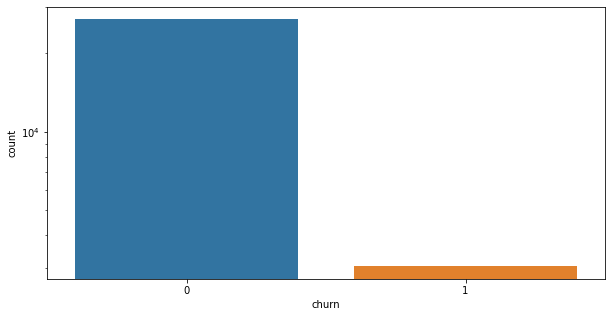

In [34]:
# Lets chek the data balance

plt.figure(figsize = (10,5))
sns.countplot(data.churn)
plt.yscale('log')

In [35]:
# Lets define functions for visualization

def plot_1(gp,ap):
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    ax1 = sns.boxplot(x = 'churn', y = gp, data = data)
    plt.title('Good_Phase')
    plt.yscale('log')
    plt.subplot(1,2,2, sharey = ax1)
    sns.boxplot(x = 'churn', y = ap, data = data)
    plt.title('Action Phase')
    plt.yscale('log')
    plt.show()

In [36]:
def plot_2(gp):
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    sns.boxplot(x = 'churn', y = gp, data = data)
    plt.yscale('log')

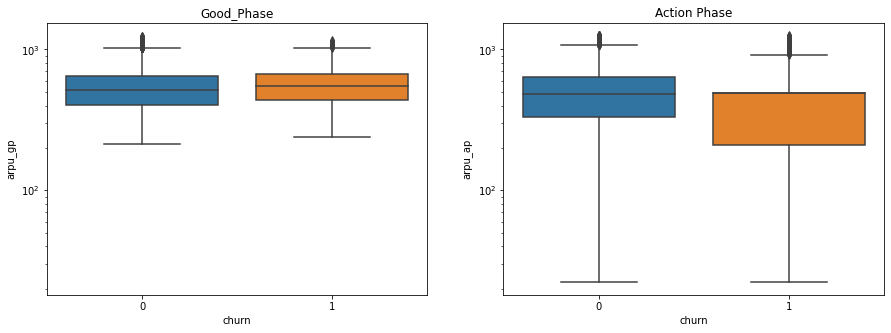

In [37]:
plot_1('arpu_gp', 'arpu_ap')

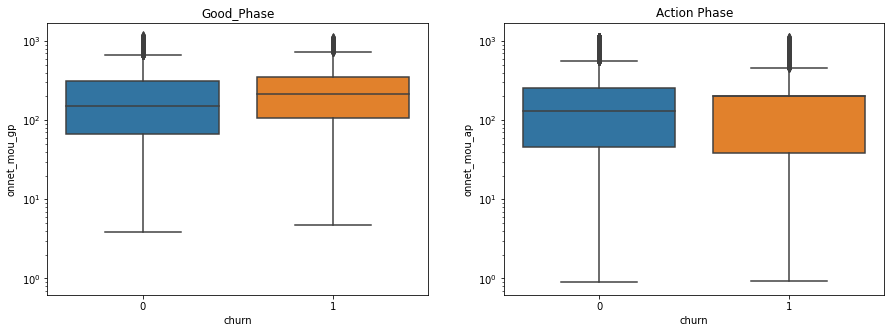

In [38]:
plot_1('onnet_mou_gp', 'onnet_mou_ap')

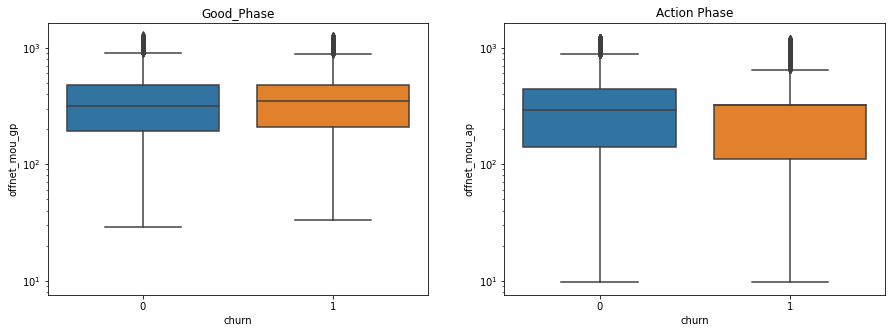

In [39]:
plot_1('offnet_mou_gp', 'offnet_mou_ap')

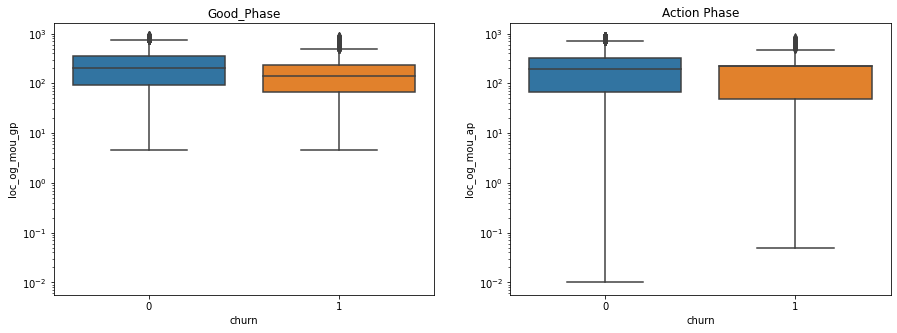

In [40]:
plot_1('loc_og_mou_gp', 'loc_og_mou_ap')

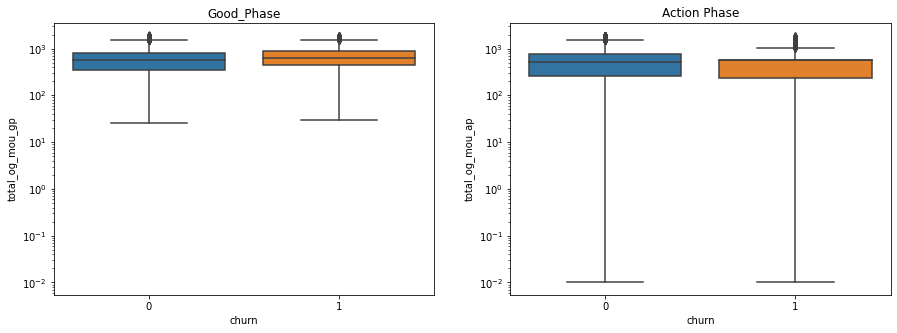

In [41]:
plot_1('total_og_mou_gp', 'total_og_mou_ap')

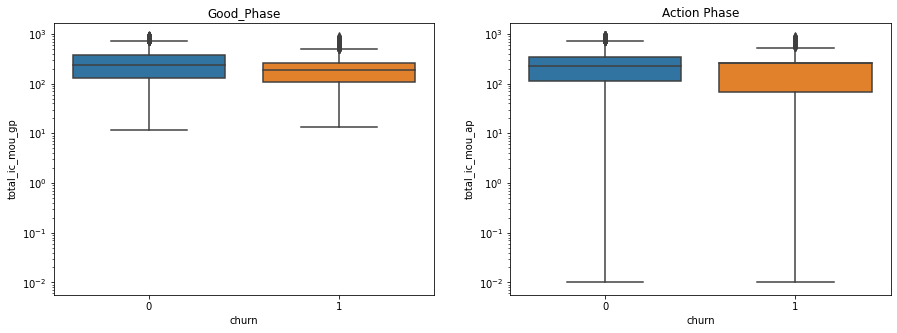

In [42]:
plot_1('total_ic_mou_gp', 'total_ic_mou_ap')

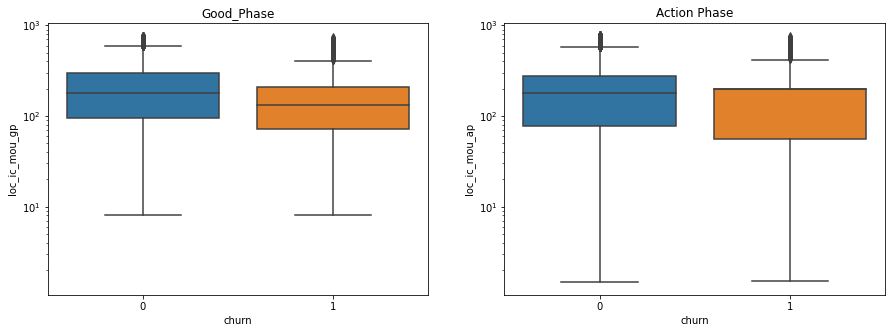

In [43]:
plot_1('loc_ic_mou_gp', 'loc_ic_mou_ap')

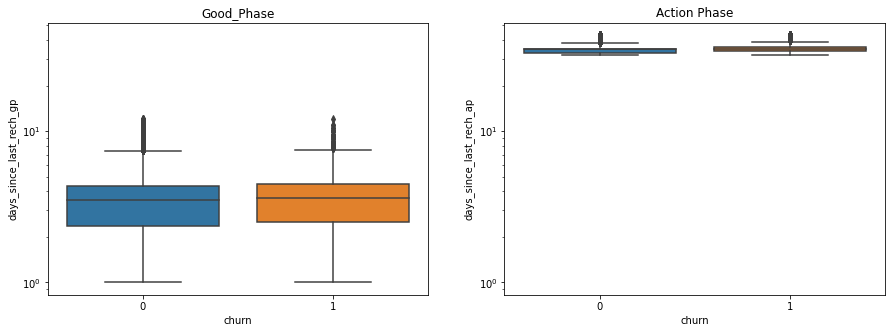

In [44]:
plot_1('days_since_last_rech_gp', 'days_since_last_rech_ap')

In [45]:
churn = data.churn
data = data.drop('churn', axis = 1)

In [46]:
# Lets scale the data

data = (data - data.mean()) / data.std()
data = pd.concat([churn, data], axis = 1)
data.head()

,churn,arpu_gp,arpu_ap,onnet_mou_gp,onnet_mou_ap,offnet_mou_gp,offnet_mou_ap,loc_og_t2t_mou_gp,loc_og_t2t_mou_ap,loc_og_t2m_mou_gp,...,total_rech_num_ap,total_rech_amt_gp,total_rech_amt_ap,max_rech_amt_gp,max_rech_amt_ap,last_day_rch_amt_gp,last_day_rch_amt_ap,aon,days_since_last_rech_gp,days_since_last_rech_ap
mobile_number,,,,,,,,,,,,,,,,,,,,,
7000000074,0,-0.000002,7.953714e-14,-0.312978,-0.412351,2.686565,1.742021e+00,0.978865,0.752315,-0.000009,...,0.355361,0.000001,8.113132e-14,1.495105,1.474380,2.030124,2.949584e+00,-1.176402e+00,-0.001199,3.703167e-12
7000000229,0,-0.173472,9.466187e-01,-0.452728,-0.767255,-0.074182,-6.649396e-01,-0.411109,-0.869154,-0.995990,...,0.172046,-0.202091,9.690469e-01,1.495105,0.139147,0.418598,6.526083e-01,9.147402e-14,0.826270,-3.274327e-01
7000000256,0,2.934788,7.953714e-14,1.880574,2.562705,0.081430,-1.173432e-14,-0.947063,-0.712809,-0.992672,...,2.921773,2.788928,8.113132e-14,-0.449504,-0.204986,-0.795419,6.526083e-01,9.147402e-14,-0.001199,3.703167e-12
7000000267,0,-1.265668,-6.829371e-02,-0.702927,-0.202776,-1.112114,-8.952534e-01,0.193653,1.544603,-0.560041,...,-0.927845,-1.007006,-2.558041e-01,1.480373,1.474380,1.836741,3.109150e-13,-9.752483e-01,-0.001199,3.703167e-12
7000000314,0,0.981985,6.036273e-01,-0.672006,-0.574382,0.744274,1.186394e+00,-0.071120,0.247363,0.849826,...,-0.011269,1.461401,1.284628e-01,-0.140134,0.125381,-1.547464,-1.261538e+00,-1.108934e+00,-0.750719,3.703167e-12


In [47]:
# lets check the churn rate

churn = (sum(data['churn']) / len(data['churn'].index)) * 100
churn

10.150438640381601

#### __Need to over come the class imbalance__

### Lets built the Model

In [48]:
X = data.drop('churn', axis = 1)
y = data['churn']

In [49]:
# lets split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100, stratify = y)

In [50]:
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [51]:
pca.components_

array([[ 7.93247487e-02,  9.90146133e-02, -5.00923919e-02, ...,
         1.07762585e-01,  3.09584645e-02,  1.82695806e-02],
       [ 2.23036919e-01,  2.32942347e-01,  2.16692945e-01, ...,
        -6.46718630e-02, -1.12989116e-01, -9.06491520e-02],
       [ 5.62728792e-02,  6.70115001e-02, -8.40217179e-02, ...,
         4.58106679e-02,  2.06206121e-01,  1.78140782e-01],
       ...,
       [-2.58352820e-01, -2.23023671e-02, -2.41940605e-01, ...,
        -4.70776084e-03, -1.29665710e-02,  1.40709824e-02],
       [-6.62002303e-01, -4.51019737e-02,  8.97601683e-02, ...,
         1.67172749e-03, -1.16216360e-02,  1.79206195e-02],
       [ 2.79797687e-02, -7.45185637e-03,  1.48893682e-02, ...,
         1.57275095e-03, -3.46592017e-04,  6.46727124e-04]])

In [52]:
colname = list(X_train.columns)
pcs_data = pd.DataFrame({'PC1' : pca.components_[0], 'PC2' : pca.components_[1], 'Feature': colname})
pcs_data.head()

,PC1,PC2,Feature
0,0.079325,0.223037,arpu_gp
1,0.099015,0.232942,arpu_ap
2,-0.050092,0.216693,onnet_mou_gp
3,-0.024725,0.232106,onnet_mou_ap
4,0.072450,0.208710,offnet_mou_gp


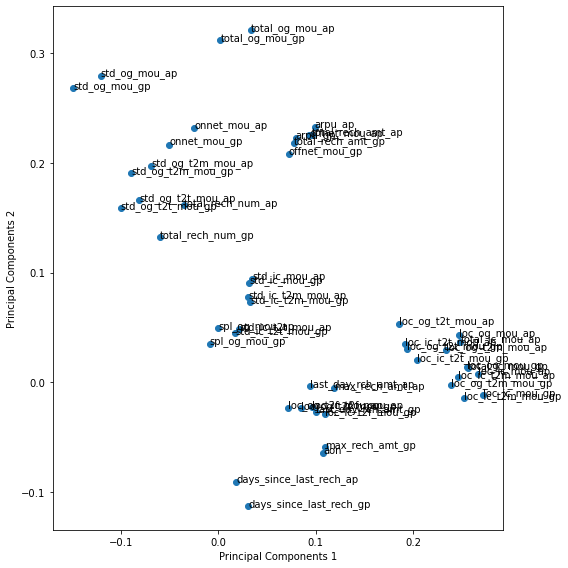

In [53]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_data.PC1, pcs_data.PC2)
plt.xlabel('Principal Components 1')
plt.ylabel('Principal Components 2')
for i, txt in enumerate(pcs_data.Feature):
    plt.annotate(txt, (pcs_data.PC1[i], pcs_data.PC2[i]))
plt.tight_layout()
plt.show()

In [54]:
pca.explained_variance_ratio_

array([0.17805502, 0.11726131, 0.06272519, 0.05991339, 0.05477077,
       0.03870408, 0.03287374, 0.03120506, 0.02825847, 0.02686689,
       0.0266983 , 0.02254508, 0.02082171, 0.02012222, 0.01693322,
       0.01607434, 0.01570381, 0.01485383, 0.01355306, 0.01305621,
       0.01197128, 0.01172018, 0.01164578, 0.01094577, 0.01062082,
       0.01039341, 0.00941333, 0.00903322, 0.008493  , 0.00737937,
       0.00692701, 0.00681145, 0.00662261, 0.00649741, 0.00630489,
       0.00607106, 0.00495193, 0.00481482, 0.00471796, 0.00406299,
       0.00391741, 0.00367034, 0.00324773, 0.00302501, 0.00287534,
       0.00268808, 0.00255978, 0.00217697, 0.00193265, 0.00188728,
       0.00162543])

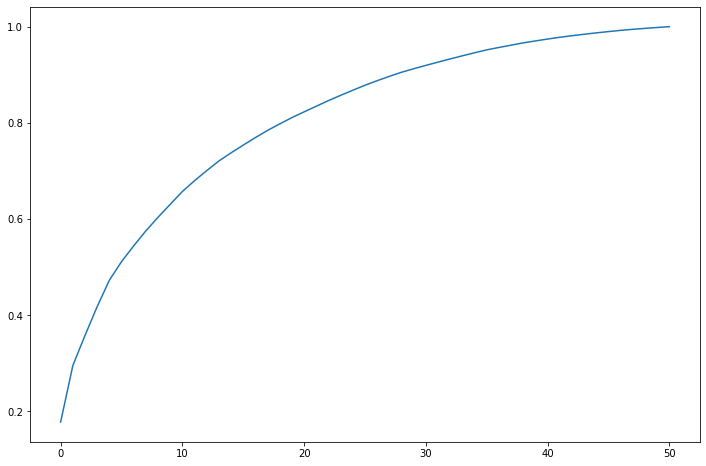

In [55]:
%matplotlib inline

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [56]:
# Features based on 95% variance
pca_2 = PCA(0.95)

pca2_train = pca_2.fit_transform(X_train)
pca2_train.shape

(20985, 36)

### Lets built the second model

In [57]:
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(pca2_train, y_train)

In [58]:
pca2_test = pca_2.transform(X_test)
pca2_test.shape

(8994, 36)

In [59]:
# prediction
pred_probs_test2 = model_pca2.predict_proba(pca2_test)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.76'

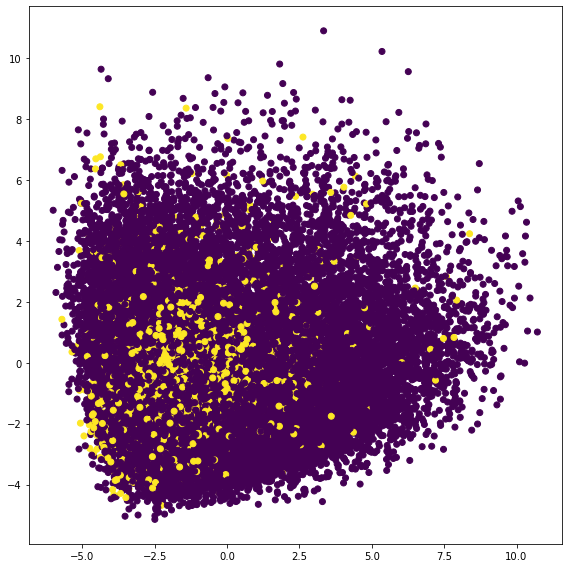

In [60]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca2_train[:,0], pca2_train[:,1], c = y_train)
plt.tight_layout()
plt.show()

In [61]:
# lets make prediction
y_train_pred = model_pca2.predict(pca2_test)

print(classification_report(y_test, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      8081
           1       0.45      0.04      0.08       913

    accuracy                           0.90      8994
   macro avg       0.68      0.52      0.51      8994
weighted avg       0.86      0.90      0.86      8994



### Class Balancing

In [62]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(random_state = 2)

In [63]:
X_train_res, y_train_res = smot.fit_resample(X_train, y_train.ravel())

In [64]:
print(sum(y_train_res == 1))
print(sum(y_train_res == 0))

18855
18855


In [65]:
# PCA

pca = PCA(svd_solver = 'randomized', random_state = 100)
pca.fit(X_train_res)
print(pca.components_)

[[ 9.58283547e-02  1.45115938e-01 -5.39012458e-02 ...  1.10547918e-01
   3.27177409e-02  1.30709736e-02]
 [ 2.25845241e-01  2.31364835e-01  2.26001206e-01 ... -6.47236928e-02
  -9.87235133e-02 -7.79287930e-02]
 [-6.25117863e-03  7.79864126e-02  2.70891050e-01 ...  7.19039661e-02
   2.44073577e-01  2.22434257e-01]
 ...
 [ 6.71891920e-01 -1.99591092e-02 -7.51884436e-02 ...  1.87365231e-03
   1.57366500e-02 -2.12799092e-02]
 [ 1.06563065e-01 -9.54479708e-04  2.95857794e-02 ...  2.97750294e-03
   2.01344146e-03 -1.65672587e-03]
 [ 1.45966385e-02 -3.45132488e-03  2.25491692e-02 ...  6.19228291e-04
  -1.76376881e-03  1.67452292e-04]]


In [66]:
cols = list(X_train.columns)
pcs_data = pd.DataFrame({'PC1': pca.components_[0], 'PC2': pca.components_[1], 'Feature':cols})
pcs_data.head()

,PC1,PC2,Feature
0,0.095828,0.225845,arpu_gp
1,0.145116,0.231365,arpu_ap
2,-0.053901,0.226001,onnet_mou_gp
3,0.002928,0.227207,onnet_mou_ap
4,0.069710,0.205647,offnet_mou_gp


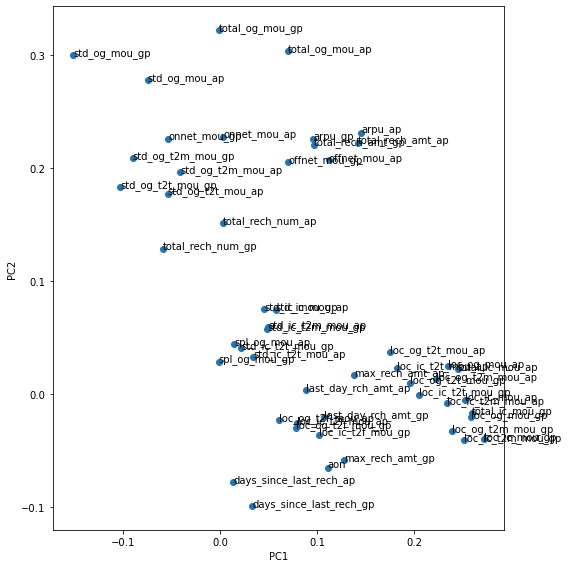

In [67]:
%matplotlib inline

fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_data.PC1, pcs_data.PC2)
plt.xlabel("PC1")
plt.ylabel('PC2')
for i, str in enumerate(pcs_data.Feature):
    plt.annotate(str, (pcs_data.PC1[i], pcs_data.PC2[i]))
plt.tight_layout()
plt.show()

In [68]:
pca.explained_variance_ratio_

array([0.17297829, 0.11421239, 0.06173177, 0.0609624 , 0.05495331,
       0.04243813, 0.03913835, 0.03260701, 0.02782621, 0.0239843 ,
       0.02295846, 0.02278586, 0.0219017 , 0.0198606 , 0.01756038,
       0.01733605, 0.01646771, 0.01580493, 0.01519217, 0.01479201,
       0.01366177, 0.01194199, 0.0114457 , 0.01054365, 0.01030352,
       0.00962709, 0.00883238, 0.00828683, 0.0078683 , 0.00748234,
       0.00715175, 0.00670845, 0.00654054, 0.00593631, 0.00568573,
       0.00556161, 0.00519196, 0.00513549, 0.00434427, 0.00387632,
       0.00377979, 0.0033201 , 0.00305449, 0.00294596, 0.00277095,
       0.00263622, 0.00237513, 0.002086  , 0.00203386, 0.00188595,
       0.00149352])

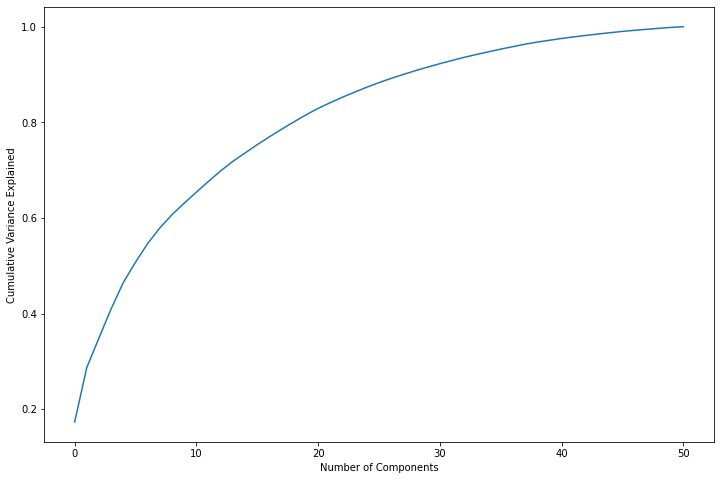

In [69]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [70]:
# Features based on 95% variance
pca_rep = PCA(0.95)

df_train_data3 = pca_rep.fit_transform(X_train_res)
df_train_data3.shape

(37710, 36)

In [71]:
# Regression Model

lr3 = LogisticRegression()
model_pca3 = lr3.fit(df_train_data3, y_train_res)

df_test_data3 = pca_rep.transform(X_test)
df_test_data3.shape

(8994, 36)

In [72]:
# lets make prediction
pred_2 = model_pca3.predict_proba(df_test_data3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_2))

'0.76'

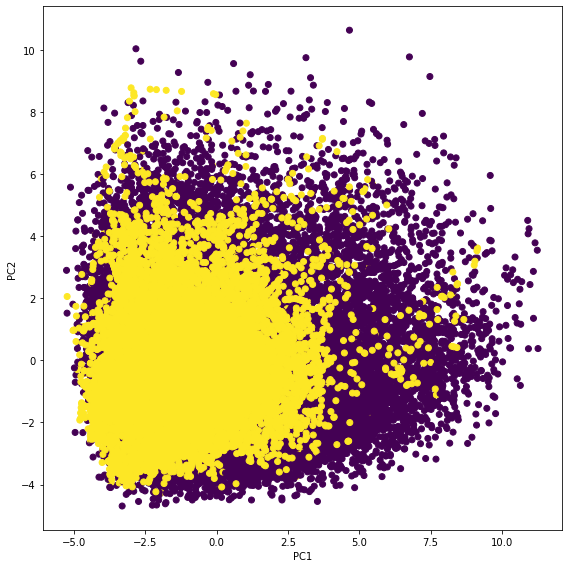

In [74]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_data3[:,0], df_train_data3[:,1], c = y_train_res)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

In [76]:
act_pca = PCA(n_components=36)
df_train_pca4= act_pca.fit_transform(X_train_res)
df_test_pca4=act_pca.transform(X_test)
df_test_pca4.shape

(8994, 36)

### Logistic Regression on Balanced Class

In [78]:
lr_pca4 = LogisticRegression()
model_pca4 = lr_pca4.fit(df_train_pca4, y_train_res)

pred_test4 = model_pca4.predict_proba(df_test_pca4)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_test4))

'0.76'

In [79]:
#prediction

y_pred_train = model_pca4.predict(df_test_pca4)
print(classification_report(y_test, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81      8081
           1       0.21      0.68      0.32       913

    accuracy                           0.70      8994
   macro avg       0.58      0.69      0.56      8994
weighted avg       0.88      0.70      0.76      8994



In [80]:
y_test_pred = lr_pca4.predict_proba(df_test_pca4)
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_0 = y_test_pred_df.iloc[:,[1]]
y_test_pred_0.head()

,1
0,0.062498
1,0.519344
2,0.122312
3,0.681322
4,0.190726


In [81]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
mobile_number,
7000739057,0
7000767750,0
7001211870,0
7000472921,0
7002388445,1


In [82]:
y_test_pred_0['mobile_number'] = y_test_df.index

In [84]:
# lets remove the index
y_test_df.reset_index(drop=True, inplace=True)

y_test_pred_1 = pd.concat([y_test_df, y_test_pred_0], axis = 1)

y_test_pred_1 = y_test_pred_1.rename(columns={1:'churn_prob'})
y_test_pred_1.head()

,churn,churn_prob,mobile_number
0,0,0.062498,7000739057
1,0,0.519344,7000767750
2,0,0.122312,7001211870
3,0,0.681322,7000472921
4,1,0.190726,7002388445


In [86]:
# lets creat new column named Predicted

y_test_pred_1['predicted'] = y_test_pred_1.churn_prob.map(lambda x : 1 if x > 0.5 else 0)

In [87]:
y_test_pred_1.head()

,churn,churn_prob,mobile_number,predicted
0,0,0.062498,7000739057,0
1,0,0.519344,7000767750,1
2,0,0.122312,7001211870,0
3,0,0.681322,7000472921,1
4,1,0.190726,7002388445,0


In [90]:
# Confusion Matrix

confusion = metrics.confusion_matrix(y_test_pred_1.churn, y_test_pred_1.predicted)
print(confusion)

[[5688 2393]
 [ 294  619]]


In [91]:
tp = confusion[1,1]
tn = confusion[0,0]
fp = confusion[0,1]
fn = confusion[1,0]

print(tp/(tp+fn))
print(tn/(tn+fp))

0.6779846659364732
0.7038732830095286


In [92]:
# Over all Accuracy

metrics.accuracy_score(y_test_pred_1.churn, y_test_pred_1.predicted)

0.7012452746275295

In [103]:
# Lets define ROC visualisation

def data_roc(actual, probs):
        fpr, tpr, threshold = metrics.roc_curve(actual, probs, drop_intermediate = False)
        score_auc = metrics.roc_auc_score(actual, probs)
        plt.figure(figsize = (8,8))
        plt.plot(fpr, tpr, label = "ROC Curve")
        plt.plot([0,1], [0,1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Flase Positive rate')
        plt.ylabel('True Positve Rate')
        plt.title('Receiver Operation Characteristic')
        plt.legend(loc = "lower right")
        plt.show()
        return fpr, tpr, threshold

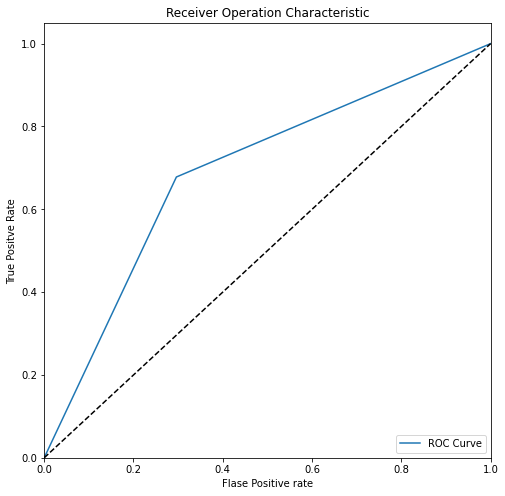

(array([0.        , 0.29612672, 1.        ]),
 array([0.        , 0.67798467, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [104]:
data_roc(y_test_pred_1.churn, y_test_pred_1.predicted)

In [105]:
"{:2.2f}".format(metrics.roc_auc_score(y_test_pred_1.churn, y_test_pred_1.churn_prob))

'0.76'

In [106]:
#other probabilities
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_1[i] = y_test_pred_1.churn_prob.map(lambda x : 1 if x > i else 0)

In [107]:
y_test_pred_1.head()

,churn,churn_prob,mobile_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.062498,7000739057,0,1,0,0,0,0,0,0,0,0,0
1,0,0.519344,7000767750,1,1,1,1,1,1,1,0,0,0,0
2,0,0.122312,7001211870,0,1,1,0,0,0,0,0,0,0,0
3,0,0.681322,7000472921,1,1,1,1,1,1,1,1,0,0,0
4,1,0.190726,7002388445,0,1,1,0,0,0,0,0,0,0,0


In [118]:
probs_df = pd.DataFrame(columns = ['prob', 'accu', 'sens', 'spec'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for x in num:
    cm1 = metrics.confusion_matrix(y_test_pred_1.churn, y_test_pred_1[x])
    total1 = sum(sum(cm1))
    accu = (cm1[0,0] + cm1[1,1]) / total1
    spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sens = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    probs_df.loc[x] = [x, accu, sens, spec]
print(probs_df)

     prob      accu      sens      spec
0.0   0.0  0.101512  1.000000  0.000000
0.1   0.1  0.186902  0.986857  0.096523
0.2   0.2  0.327107  0.946331  0.257146
0.3   0.3  0.464532  0.878423  0.417770
0.4   0.4  0.592728  0.790800  0.570350
0.5   0.5  0.701245  0.677985  0.703873
0.6   0.6  0.786191  0.559693  0.811781
0.7   0.7  0.847231  0.403067  0.897414
0.8   0.8  0.882255  0.230011  0.955946
0.9   0.9  0.895375  0.056955  0.990100


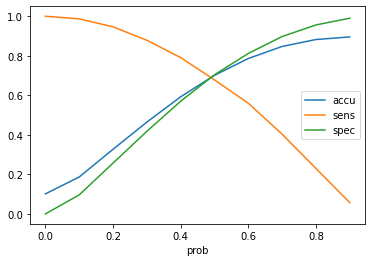

In [119]:
probs_df.plot.line(x='prob', y=['accu', 'sens', 'spec'])
plt.show()

In [121]:
# 0.45 is optimum point

y_test_pred_1['predicted'] = y_test_pred_1.churn_prob.map(lambda x : 1 if x > 0.45 else 0)
y_test_pred_1.head()

,churn,churn_prob,mobile_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.062498,7000739057,0,1,0,0,0,0,0,0,0,0,0
1,0,0.519344,7000767750,1,1,1,1,1,1,1,0,0,0,0
2,0,0.122312,7001211870,0,1,1,0,0,0,0,0,0,0,0
3,0,0.681322,7000472921,1,1,1,1,1,1,1,1,0,0,0
4,1,0.190726,7002388445,0,1,1,0,0,0,0,0,0,0,0


In [122]:
# lets check the accuracy
metrics.accuracy_score(y_test_pred_1.churn, y_test_pred_1.predicted)

0.6480987324883255

In [124]:
confusion2 = metrics.confusion_matrix(y_test_pred_1.churn, y_test_pred_1.predicted)
confusion2

array([[5165, 2916],
       [ 249,  664]], dtype=int64)

In [125]:
tp = confusion2[1,1]
tn = confusion2[0,0]
fp = confusion2[0,1]
fn = confusion2[1,0]

print(tp/float(tp+fn))
print(tn/float(tn+fp))
print(fp/float(tn+fp))
print(tp/float(tp+fp))
print(tn/float(tn+fn))

0.7272727272727273
0.63915357010271
0.36084642989728993
0.18547486033519553
0.954008127077946


In [126]:
confusion = metrics.confusion_matrix(y_test_pred_1.churn, y_test_pred_1.predicted)
confusion

array([[5165, 2916],
       [ 249,  664]], dtype=int64)

In [127]:
# precision for predicted at 0.45
tp/(tp+fp)

0.18547486033519553

In [129]:
# Recall for 0.45
tp/(tp+fn)

0.7272727272727273

In [128]:
# precision for predicted at 0.50
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.18547486033519553

In [131]:
# recall for 0.50
confusion[1,1]/(confusion[1,0] + confusion[1,1])

0.7272727272727273

In [132]:
# recall and precision trade off

from sklearn.metrics import precision_recall_curve

y_test_pred_1.churn, y_test_pred_1.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 8989    0
 8990    0
 8991    0
 8992    0
 8993    0
 Name: churn, Length: 8994, dtype: int32,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 8989    0
 8990    0
 8991    1
 8992    0
 8993    0
 Name: predicted, Length: 8994, dtype: int64)

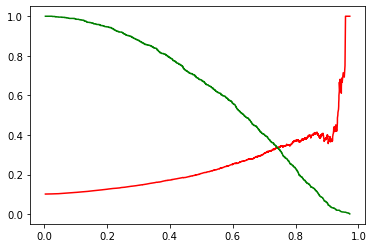

In [134]:
p, r, threshold = precision_recall_curve(y_test_pred_1.churn, y_test_pred_1.churn_prob)

plt.plot(threshold, p[:-1], "r-")
plt.plot(threshold, r[:-1], "g-")
plt.show()

### Feature Selection

In [136]:
# Random forest with default parameters

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [137]:
# predictions

predictions = rfc.predict(X_test)

In [147]:
# reports

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Classification report: \n{classification_report(y_test, predictions)}')
print(f'Accuracy Score - {accuracy_score(y_test, predictions)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      8081
           1       0.60      0.52      0.56       913

    accuracy                           0.92      8994
   macro avg       0.77      0.74      0.76      8994
weighted avg       0.91      0.92      0.91      8994

Accuracy Score - 0.9162775183455637


In [149]:
# Confusion Matrix
print("Confustion Matrix:\n", confusion_matrix(y_test, predictions))

Confustion Matrix:
 [[7764  317]
 [ 436  477]]


In [151]:
# Hyper parameter tuning

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

params_grid = {
        'max_depth': [4,8,10],
        'min_samples_leaf': range(100,400,200),
        'min_samples_split': range(200,500,200),
        'n_estimators': [100,200,300],
        'max_features':[5,10]
}

In [153]:
# Lets create a base model

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = params_grid, cv = 3, n_jobs = -1, verbose = 1)

In [154]:
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [157]:
print('Accuracy', grid_search.best_score_, 'using',grid_search.best_params_)

Accuracy 0.8787854680456112 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


#### Lets run the model with tuned hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap = True, max_depth = 10, min_samples_leaf = 100,
                            min_samples_split = 400, max_features = 10, n_estimators = 200)

In [ ]:
rfc.fit(X_train_res, y_train_res)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

In [158]:
feature_list = []
for i in zip(X_train.columns, rfc.feature_importances_):
    feature_list.append(i)
    
features = pd.DataFrame(feature_list, columns = ['features', 'Importance'])
features.sort_values(by = 'Importance', ascending = False).head(10)

,features,Importance
47,last_day_rch_amt_ap,0.117949
39,total_ic_mou_ap,0.057973
31,loc_ic_mou_ap,0.050251
27,loc_ic_t2m_mou_ap,0.049609
13,loc_og_mou_ap,0.040888
23,total_og_mou_ap,0.037155
9,loc_og_t2m_mou_ap,0.034836
7,loc_og_t2t_mou_ap,0.033426
19,std_og_mou_ap,0.030507
41,total_rech_num_ap,0.028939
